In [1]:
%matplotlib inline
import astropy.utils.data
import geopandas as gpd
import zipfile
from matplotlib import pyplot as plt

### Download sample data from John Deere

In [2]:
print("Downloading and unzipping seeding sample shapefile")
seedingZip = astropy.utils.data.download_file("https://github.com/JohnDeere/SampleData/blob/master/Shapefiles/Export%20From%20MyJohnDeere%20-%20Seeding.zip?raw=true", cache=True, show_progress=True)
with zipfile.ZipFile(seedingZip, 'r') as zip_ref:
    zip_ref.extractall("./.cache/seeding")
seedingShp = "./.cache/seeding/doc/Merriweather Farms-JT-01-Soybeans.shp"
    
print("Downloading and unzipping harvest sample shapefile")
harvestZip = astropy.utils.data.download_file("https://github.com/JohnDeere/SampleData/blob/master/Shapefiles/Export%20From%20MyJohnDeere%20-%20Harvest.zip?raw=true", cache=True, show_progress=True)
with zipfile.ZipFile(harvestZip, 'r') as zip_ref:
    zip_ref.extractall("./.cache/harvest")
harvestShp = "./.cache/harvest/doc/Merriweather Farms-JT-01-Soybeans.shp"
print("OK")

OK


### Take a look at overall data

In [3]:
gdf = gpd.read_file(seedingShp)
gdf.head()

,Time,Crop,AppliedRate,SWATHWIDTH,DISTANCE,Heading,SECTIONID,ControlRate,TargetRate,Variety,Elevation,IsoTime,geometry
0,4/23/2016 2:32:04 PM,174,64231.705136,2.5,5.681373,358.913879,898,None,139996.951077,23A42,774.416886,2016-04-23T14:32:04.200Z,POINT Z (-93.15040 41.66667 0.00000)
1,4/23/2016 2:32:04 PM,174,64231.705136,2.5,5.681373,358.913879,899,None,139996.951077,23A42,774.416886,2016-04-23T14:32:04.200Z,POINT Z (-93.15039 41.66667 0.00000)
2,4/23/2016 2:32:04 PM,174,64231.705136,2.5,5.681373,358.913879,900,None,139996.951077,23A42,774.416886,2016-04-23T14:32:04.200Z,POINT Z (-93.15038 41.66667 0.00000)
3,4/23/2016 2:32:04 PM,174,64231.705136,2.5,5.681373,358.913879,901,None,139996.951077,23A42,774.416886,2016-04-23T14:32:04.200Z,POINT Z (-93.15037 41.66667 0.00000)
4,4/23/2016 2:32:04 PM,174,64231.705136,2.5,5.681373,358.913879,902,None,139996.951077,23A42,774.416886,2016-04-23T14:32:04.200Z,POINT Z (-93.15036 41.66667 0.00000)


In [4]:
gdf.describe()

,Crop,AppliedRate,SWATHWIDTH,DISTANCE,Heading,SECTIONID,TargetRate,Elevation
count,55285.0,55285.000000,55285.0,55285.000000,55285.000000,55285.000000,5.528500e+04,55285.000000
mean,174.0,137553.302887,2.5,7.865543,189.235136,3156.180067,1.399970e+05,772.193992
std,0.0,11631.565984,0.0,2.093280,98.012066,471.099885,5.820819e-11,1.201131
min,174.0,0.000000,2.5,0.035815,0.004728,898.000000,1.399970e+05,767.210316
25%,174.0,138592.691898,2.5,8.549188,90.075892,2972.000000,1.399970e+05,771.597184
50%,174.0,139632.733998,2.5,8.614805,179.111013,2980.000000,1.399970e+05,772.433413
75%,174.0,140466.386422,2.5,8.664424,270.165892,3502.000000,1.399970e+05,772.968575
max,174.0,256056.746415,2.5,9.845526,359.931976,3510.000000,1.399970e+05,775.382888


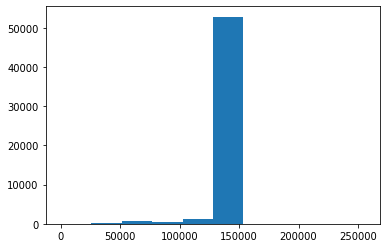

In [5]:
hist = plt.hist(gdf["AppliedRate"])

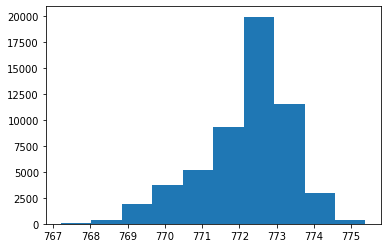

In [6]:
hist = plt.hist(gdf["Elevation"])

#### Elevation map (seeding)

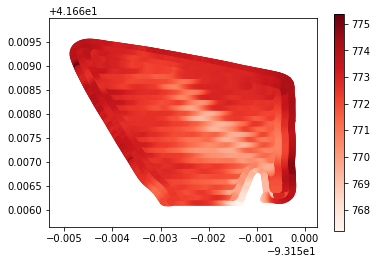

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf.plot(ax=ax, column='Elevation', cmap='Reds', figsize=(50, 50), legend=True)
plt.show()

Note: There seems to have a time shift between sensor acquisition and position acquisition

#### Applied Rate (seeding)

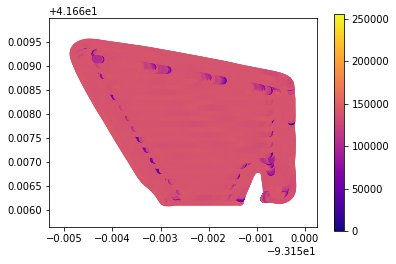

In [8]:
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf.plot(ax=ax, column='AppliedRate', cmap='plasma', figsize=(50, 50), legend=True)
plt.show()

### Take a look at seeders

#### Are planters equal?

In [22]:
import seaborn as sns
sns.set()

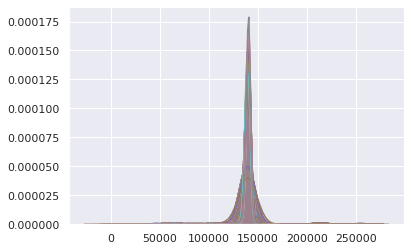

In [23]:
for sid in gdf['SECTIONID'].unique():
    sns.kdeplot(gdf.loc[gdf['SECTIONID']==sid]["AppliedRate"], shade=True, legend=False)

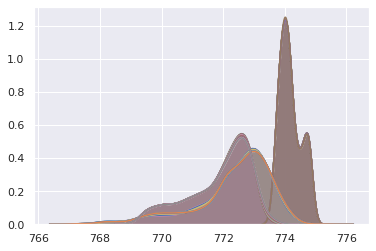

In [24]:
for sid in gdf['SECTIONID'].unique():
    sns.kdeplot(gdf.loc[gdf['SECTIONID']==sid]["Elevation"], shade=True, legend=False)